Below is the code to download and set up the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import kagglehub
trolukovich_food11_image_dataset_path = kagglehub.dataset_download('trolukovich/food11-image-dataset')

print('Data source import complete.')


In [ ]:
%cd organized_food11_test_data

In [ ]:
# The data is structured under /evaluation in 10 class labels.
# So, we are moving the data into one folder that contains 1000+ images and writing their target labels to a text file
import os
import shutil

base_dataset_path = '/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1'

images_source_dir = os.path.join(base_dataset_path, 'evaluation')

output_dir = '/content/organized_food11_test_data'
output_labels_path = os.path.join(output_dir, 'labels.txt')

if os.path.exists(output_dir):
    print(f"Removing existing output directory: {output_dir}")
    shutil.rmtree(output_dir)

os.makedirs(output_dir, exist_ok=True)

print(f"Creating output directory: {output_dir}")

image_data = []


for class_label in sorted(os.listdir(images_source_dir)):
    class_dir = os.path.join(images_source_dir, class_label)

    if os.path.isdir(class_dir):
        print(f"Processing class: {class_label}")
        images_in_class = sorted([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

        for image_file in images_in_class[:100]:
            src_image_path = os.path.join(class_dir, image_file)
            unique_image_filename = f"{class_label}_{image_file}"
            image_data.append((unique_image_filename, src_image_path, class_label))

copied_count = 0
with open(output_labels_path, 'w') as out_f:
    for unique_image_filename, src_path, label in image_data:
        dst_path = os.path.join(output_dir, unique_image_filename)
        shutil.copy(src_path, dst_path)
        out_f.write(label + '\n')
        copied_count += 1

print(f"Copied {copied_count} images to '{output_dir}' and labels saved to '{output_labels_path}'.")

final_image_count = 0
for filename in os.listdir(output_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        final_image_count += 1
print(f"Final count of image files (JPG, PNG, JPEG) in '{output_dir}': {final_image_count}")

print("Contents of the new folder (first 10 files):")
!ls -l {output_dir} | head -n 11 # Display header + first 10 files

Verify the count


In [ ]:
import os

directory_path = '/content/organized_food11_test_data'

jpg_count = 0
for filename in os.listdir(directory_path):
    if filename.lower().endswith('.jpg'):
        jpg_count += 1

print(f"Number of JPG files in '{directory_path}': {jpg_count}")

In [ ]:
import os

output_dir = '/content/organized_food11_test_data'
output_labels_path = os.path.join(output_dir, 'labels.txt')

line_count = 0
with open(output_labels_path, 'r') as f:
    for line in f:
        line_count += 1

print(f"Number of lines in '{output_labels_path}': {line_count}")

In [ ]:
!pip install -q condacolab

In [3]:
# Install condacolab

import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [1]:
!conda create -n diffattack -y -c nvidia -c conda-forge python=3.8 cuda-toolkit=11.3 cudnn=8.4.1 ipykernel

Channels:
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/diffattack

  added / updated specs:
    - cuda-toolkit=11.3
    - cudnn=8.4.1
    - ipykernel
    - python=3.8


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    asttokens-3.0.0            |     pyhd8ed1ab_0          27 KB  conda-forge
    backcall-0.2.0             |     pyh9f0ad1d_0          13 KB  conda-forge
    bzip2-1.0.8                |       hda65f42_8         254 KB  conda-forge
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    comm-0.2.2                 |     pyhd8ed1ab_0          12 KB  conda-forge
    cuda-cccl-12.4.1

In [2]:
# Clone the repository
!git clone https://github.com/gavingleinig/semantic-transformation-adv-attack
%cd semantic-transformation-adv-attack
!git checkout vijay
!git branch
# Remove torch from requirements.txt to install it manually
# The specified version (torch==1.12.0+cu113) isn't on the default PyPI
!sed -i '/torch/d' requirements.txt

# Install PyTorch 1.12.0 for CUDA 11.3 from the correct index
# We use the environment's pip, pointing to the diffattack env
!/usr/local/envs/diffattack/bin/pip install torch==1.12.0+cu113 --extra-index-url https://download.pytorch.org/whl/cu113

# Install the rest of the requirements
!/usr/local/envs/diffattack/bin/pip install -r requirements.txt

Cloning into 'semantic-transformation-adv-attack'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 107 (delta 34), reused 31 (delta 14), pack-reused 51 (from 1)
Receiving objects: 100% (107/107), 96.07 MiB | 39.83 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/kaggle/working/semantic-transformation-adv-attack
Branch 'vijay' set up to track remote branch 'vijay' from 'origin'.
Switched to a new branch 'vijay'
  main
* vijay
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 10.3 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
Reason for being yanked: deprecated, use  4.5.4.60
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [3]:
!/usr/local/envs/diffattack/bin/pip install transformers
!/usr/local/envs/diffattack/bin/pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.4 MB/s eta 0:00:00


In [12]:
!conda init --all



no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
modified      /root/.zshrc
modified      /root/.config/fish/config.fish
modified      /root/.xonshrc
modified      /root/.tcshrc

==> For changes to take effect, close and re-open your current shell. <==



In [6]:
!conda activate diffattack


CondaError: Run 'conda init' before 'conda activate'



In [4]:
!conda init

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [13]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/local/bin/huggingface-cli", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/huggingf

In [4]:
!mkdir -p pretrained_models

# Define the list of URLs to download
urls = [
    "https://github.com/ylhz/tf_to_pytorch_model/releases/download/v1.0/tf2torch_adv_inception_v3.npy",
    "https://github.com/ylhz/tf_to_pytorch_model/releases/download/v1.0/tf2torch_ens3_adv_inc_v3.npy",
    "https://github.com/ylhz/tf_to_pytorch_model/releases/download/v1.0/tf2torch_ens4_adv_inc_v3.npy",
    "https://github.com/ylhz/tf_to_pytorch_model/releases/download/v1.0/tf2torch_ens_adv_inc_res_v2.npy"
]

# Download each file into the 'pretrained_models' directory
# The -P flag in wget specifies the destination directory.
for url in urls:
    print(f"Downloading {url.split('/')[-1]}...")
    !wget -P pretrained_models {url}

print("\nAll models downloaded into 'pretrained_models' directory.")

print("\nVerifying contents:")
!ls -l pretrained_models

--2025-11-20 04:58:14--  https://github.com/ylhz/tf_to_pytorch_model/releases/download/v1.0/tf2torch_adv_inception_v3.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/372736637/b5782200-c89a-11eb-86d6-5e72ed454e1a?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-20T05%3A37%3A33Z&rscd=attachment%3B+filename%3Dtf2torch_adv_inception_v3.npy&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-20T04%3A37%3A09Z&ske=2025-11-20T05%3A37%3A33Z&sks=b&skv=2018-11-09&sig=OQMnyWlMYJXUPx2Loi2OmvkIlEz7pFtpkWiMFkklZY0%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MzYxODI5NCwibmJmIjoxNzYzNjE0Njk0LCJwYXRoIjoicmV

In [5]:
!/usr/local/envs/diffattack/bin/python main.py \
    --model_name "inception" \
    --save_dir "outputs/" \
    --images_root "demo/images/" \
    --label_path "demo/labels.txt" \
    --pretrained_diffusion_path="stable-diffusion-v1-5/stable-diffusion-v1-5"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]

******Attack based on Diffusion, Attacked Dataset: imagenet_compatible*********
Fetching 15 files:   0%|                                 | 0/15 [00:00<?, ?it/s]
config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]


special_tokens_map.json:   0%|                        | 0.00/472 [00:00<?, ?B/s]



special_tokens_map.json: 100%|█████████████████| 472/472 [00:00<00:00, 27.5kB/s]



scheduler_config.json:   0%|                          | 0.00/308 [00:00<?, ?B/s]




config.json: 100%|█████████████████████████████| 617/617 [00:00<00:00, 56.1kB/s]
config.json: 4.72kB [00:00, 96.4kB/s]
merges.txt: 525kB [00:00, 8.12MB/s]              | 1/15 [00:00<00:02,  4.85it/s]

text_encoder/model.safetensors:   0%|                | 0.00/492M 

In [12]:
!/usr/local/envs/diffattack/bin/python main.py \
    --model_name "inception" \
    --save_dir "outputs_cw/" \
    --images_root "demo/images/" \
    --label_path "demo/labels.txt" \
    --attack_mode "transform_dependent" \
    --attack_loss_type cw \
    --cw_kappa 1.0 \
    --pretrained_diffusion_path="stable-diffusion-v1-5/stable-diffusion-v1-5"


******Attack based on Diffusion, Attacked Dataset: imagenet_compatible*********
Loading pipeline components...: 100%|█████████████| 7/7 [00:00<00:00,  9.54it/s]


Processing Image 1/10: demo_01.png

Accuracy on benign examples: 100.0%
gt_label: 809 pred_label: 809 pred_clean_logit 0.9941673278808594
prompt generate:  soup bowl  	labels:  [[809]]
decoder:  [49406, 7077, 3814, 49407] [49406, 49407]
Optimize_uncond_embed: 100%|██████████████████████| 5/5 [00:14<00:00,  2.85s/it]

****** Running in Transform-Dependent Attack Mode ******
Iterations: 100%|█| 30/30 [01:00<00:00,  2.03s/it, attack_loss: 0.00000 variance

****** Transformation-Dependent Evaluation ******
[Scale 0.5x (Attack)] Target: 909 | Pred: 909 | Success Rate: 100.0%
[Scale 1.0x (Benign)] Target: 809 | Pred: 809 | Success Rate: 100.0%
L1: [3687.118]	L2: [12.610733]	Linf: [0.35294116]


Processing Image 2/10: demo_02.png

Accuracy on benign examples: 100.0%
gt_label: 605 pred_label: 605 pred_clean_logit 0.9079948663711548


In [ ]:
output_dir

In [ ]:
!/usr/local/envs/diffattack/bin/python main.py \
    --model_name "inception" \
    --save_dir "outputs_food_data/" \
    --images_root "/content/organized_food11_test_data" \
    --label_path "/content/organized_food11_test_data/labels.txt" \
    --attack_mode "transform_dependent" \
    --attack_loss_type cw \
    --cw_kappa 1.0 \
    --pretrained_diffusion_path="stable-diffusion-v1-5/stable-diffusion-v1-5"

In [11]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 730 bytes | 365.00 KiB/s, done.
From https://github.com/gavingleinig/semantic-transformation-adv-attack
   182d437..0804168  vijay      -> origin/vijay
Updating 182d437..0804168
Fast-forward
 diff_latent_attack.py | 24 ++++++++++++++++++++++--
 1 file changed, 22 insertions(+), 2 deletions(-)


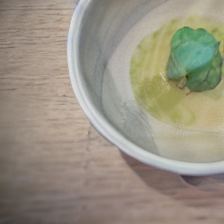

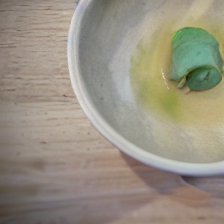

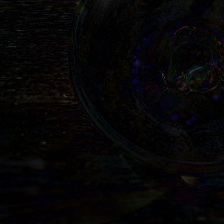

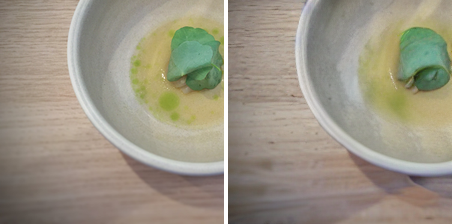

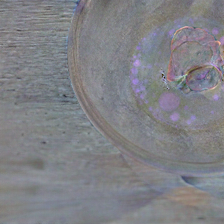

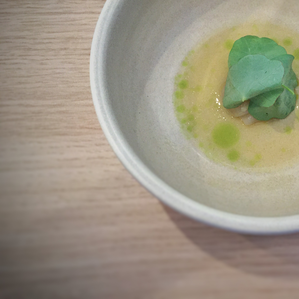

In [13]:
from IPython.display import Image, display
display(Image('outputs/0000_adv_image.png')) 

display(Image('outputs_cw/0000_adv_image.png')) 
display(Image('outputs_cw/0000_diff_absolute.png')) 
display(Image('outputs_cw/0000_diff_inception_image_ATKSuccess.png')) 
display(Image('outputs_cw/0000_diff_relative.png')) 
display(Image('outputs_cw/0000_originImage.png')) 

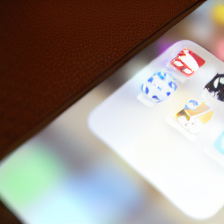

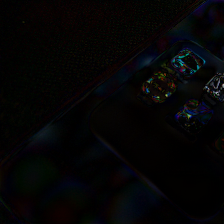

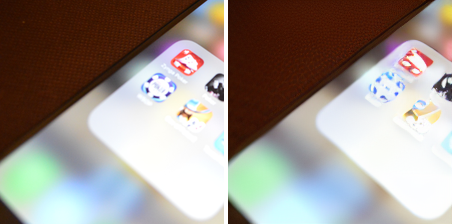

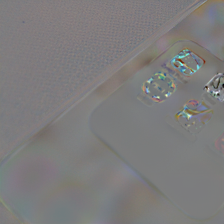

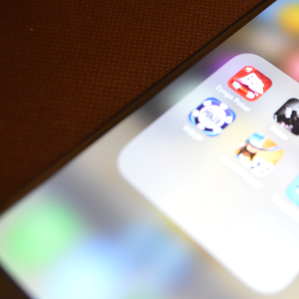

In [14]:
display(Image('outputs_cw/0001_adv_image.png')) 
display(Image('outputs_cw/0001_diff_absolute.png')) 
display(Image('outputs_cw/0001_diff_inception_image_ATKSuccess.png')) 
display(Image('outputs_cw/0001_diff_relative.png')) 
display(Image('outputs_cw/0001_originImage.png')) 

In [16]:
!pip install -U PyDrive2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 132.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 31.1 MB/s eta 0:00:00


In [18]:
from zipfile import ZipFile
import os
import shutil

# Zip your image directory (replace 'images_dir' with your directory)
shutil.make_archive('images_backup', 'zip', 'outputs_cw')


'/kaggle/working/semantic-transformation-adv-attack/images_backup.zip'